### Importing Libraries

In [1]:
import numpy as np,pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math 


## imputer
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.cluster import KMeans


from sklearn.metrics import accuracy_score,confusion_matrix,classification_report





## Reading dataset

In [2]:

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
telecomData = pd.read_csv("./train.csv/train.csv")
telecomData.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   0        109             0.0             0.0             0.0   
1   1        109             0.0             0.0             0.0   
2   2        109             0.0             0.0             0.0   
3   3        109             0.0             0.0             0.0   
4   4        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   31.277   
1            6/30/2014            7/31/2014            8/31/2014    0.000   
2            6/30/2014            7/31/2014            8/31/2014   60.806   
3            6/30/2014            7/31/2014            8/31/2014  156.362   
4            6/30/2014            7/31/2014            8/31/2014  240.708   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   87.009    7.527        48.58       124.38         1.29         32.24   
1  122.787   42.953         0.00         0.00         0.00          0.00   
2  103.176    0.000         0.53        15.93         0.00         53.99   
3  205.260  111.095         7.26        16.01         0.00         68.76   
4  128.191  101.565        21.28         4.83         6.13         56.99   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         96.68          2.33           0.00            0.0            0.0   
1         25.99         30.89           0.00            0.0            0.0   
2         82.05          0.00           0.00            0.0            0.0   
3         78.48         50.23           0.00            0.0            0.0   
4         38.11          9.63          53.64            0.0            0.0   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00            0.0           0.00              2.23   
1           0.00            0.0           0.00              0.00   
2           0.00            0.0           0.00              0.53   
3           0.00            0.0           1.63              6.99   
4          15.73            0.0           0.00             10.16   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0              0.00              0.28              5.29             16.04   
1              0.00              0.00              0.00              0.00   
2             12.98              0.00             24.11              0.00   
3              3.94              0.00             37.91             44.89   
4              4.83              6.13             36.74             19.88   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              2.33              0.00              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             23.63              0.00              0.00              0.00   
4              4.61             11.99              1.23              5.01   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0              0.00              0.00              0.00          7.53   
1              0.00             22.01             29.79          0.00   
2              2.14              0.00              0.00         24.64   
3              0.00              0.00              8.03         44.91   
4              0.00              9.85              0.00         58.91   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         16.04          2.61             46.34            124.38   
1          0.00          0.00              0.00              0.00   
2         12.98          0.00              0.00              2.94   
3         48.84         23.63              0.26             12.06   
4         25.94         15.76              0.00              0.00   

   std_og_t2t_mo

### Fetching the  data type  of the data set

In [3]:



telecomData.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

### Checking null values

In [4]:
nullcolumns = telecomData.columns[telecomData.isnull().sum()>0]

In [5]:
nullPercentage = round(100*(telecomData.isnull().sum()/len(telecomData)),2)
morethanHalfMissing = telecomData.columns[nullPercentage>50]
morethanHalfMissing

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
       'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6',
       'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7',
       'fb_user_8'],
      dtype='object')

## Data Clean Up


#### Droping columns which doesnot have any significance impact or  more than 50 % values are missing 

In [6]:
### columns which have more than 50% null values.
telecomData.drop(morethanHalfMissing,inplace=True,axis=1)

telecomData.drop(["circle_id","last_date_of_month_6","last_date_of_month_7","last_date_of_month_8"],inplace=True,axis=1)

telecomData.drop_duplicates(inplace=True)

In [7]:
telecomData['arpu_total'] =telecomData.arpu_6+telecomData.arpu_7+telecomData.arpu_8
telecomData.drop(['arpu_6','arpu_7','arpu_8'],axis=1,inplace=True)


telecomData['onnet_mou_total'] =telecomData.onnet_mou_6+telecomData.onnet_mou_7+telecomData.onnet_mou_8
telecomData.drop(['onnet_mou_6','onnet_mou_7','onnet_mou_8'],axis=1,inplace=True)


telecomData['offnet_mou_total'] =telecomData.offnet_mou_6+telecomData.offnet_mou_7+telecomData.offnet_mou_8
telecomData.drop(['offnet_mou_6','offnet_mou_7','offnet_mou_8'],axis=1,inplace=True)

In [8]:
telecomData['roam_ic_mou_total'] =telecomData.roam_ic_mou_6+telecomData.roam_ic_mou_7+telecomData.roam_ic_mou_8
telecomData.drop(['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8'],axis=1,inplace=True)


telecomData['roam_og_mou_total'] =telecomData.roam_og_mou_6+telecomData.roam_og_mou_7+telecomData.roam_og_mou_8
telecomData.drop(['roam_og_mou_6','roam_og_mou_7','roam_og_mou_8'],axis=1,inplace=True)


telecomData['loc_og_t2c_mou_total'] =telecomData.loc_og_t2c_mou_6+telecomData.loc_og_t2c_mou_7+telecomData.loc_og_t2c_mou_8
telecomData.drop(['loc_og_t2c_mou_6','loc_og_t2c_mou_7','loc_og_t2c_mou_8'],axis=1,inplace=True)

In [9]:
telecomData['loc_og_mou_total'] =telecomData.loc_og_mou_6+telecomData.loc_og_mou_7+telecomData.loc_og_mou_8
telecomData.drop(['loc_og_mou_6','loc_og_mou_7','loc_og_mou_8'],axis=1,inplace=True)


telecomData['std_og_t2t_mou_total'] =telecomData.std_og_t2t_mou_6+telecomData.std_og_t2t_mou_7+telecomData.std_og_t2t_mou_8
telecomData.drop(['std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8'],axis=1,inplace=True)


telecomData['std_og_t2m_mou_total'] =telecomData.std_og_t2m_mou_6+telecomData.std_og_t2m_mou_7+telecomData.std_og_t2m_mou_8
telecomData.drop(['std_og_t2m_mou_6','std_og_t2m_mou_7','std_og_t2m_mou_8'],axis=1,inplace=True)

In [10]:
telecomData['loc_og_t2f_mou_total'] =telecomData.loc_og_t2f_mou_6+telecomData.loc_og_t2f_mou_7+telecomData.loc_og_t2f_mou_8
telecomData.drop(['loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8'],axis=1,inplace=True)


telecomData['loc_og_t2m_mou_total'] =telecomData.loc_og_t2m_mou_6+telecomData.loc_og_t2m_mou_7+telecomData.loc_og_t2m_mou_8
telecomData.drop(['loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8'],axis=1,inplace=True)


telecomData['loc_og_t2t_mou_total'] =telecomData.loc_og_t2t_mou_6+telecomData.loc_og_t2t_mou_7+telecomData.loc_og_t2t_mou_8
telecomData.drop(['loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8'],axis=1,inplace=True)

In [11]:
telecomData['std_og_t2f_mou_total'] =telecomData.std_og_t2f_mou_6+telecomData.std_og_t2f_mou_7+telecomData.std_og_t2f_mou_8
telecomData.drop(['std_og_t2f_mou_6','std_og_t2f_mou_8','std_og_t2f_mou_7'],axis=1,inplace=True)


telecomData['std_og_t2c_mou_total'] =telecomData.std_og_t2c_mou_6+telecomData.std_og_t2c_mou_7+telecomData.std_og_t2c_mou_8
telecomData.drop(['std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8'],axis=1,inplace=True)


telecomData['std_og_mou_total'] =telecomData.std_og_mou_6+telecomData.std_og_mou_7+telecomData.std_og_mou_8
telecomData.drop(['std_og_mou_7','std_og_mou_8','std_og_mou_6'],axis=1,inplace=True)

telecomData['total_rech_num_total'] =telecomData.total_rech_num_6+telecomData.total_rech_num_7+telecomData.total_rech_num_8
telecomData.drop(['total_rech_num_7','total_rech_num_8','total_rech_num_6'],axis=1,inplace=True)

In [12]:
## all the non object columns

nonObjectColumns = telecomData.columns[telecomData.dtypes !='object']
objectColumns = telecomData.columns[telecomData.dtypes=='object']

In [13]:
objectColumns

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'], dtype='object')

#### converting the object data type to data time inprder to extract the RFM informatiom

In [14]:
for objectType in objectColumns:
    telecomData[objectType] = pd.to_datetime(telecomData[objectType],format="%m/%d/%Y")

In [15]:
max_date = telecomData.date_of_last_rech_8.max() 

In [16]:
for objectType in objectColumns:
    telecomData[objectType] = max_date-telecomData[objectType]

In [17]:
telecomData.head()

id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  isd_og_mou_6  \
0   0             0.0             0.0             0.0           0.0   
1   1             0.0             0.0             0.0           0.0   
2   2             0.0             0.0             0.0           0.0   
3   3             0.0             0.0             0.0           0.0   
4   4             0.0             0.0             0.0           0.0   

   isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  \
0           0.0           0.0          8.20          0.63          0.00   
1           0.0           0.0          0.00         30.73         31.66   
2           0.0           0.0          2.89          1.38          0.00   
3           0.0           0.0         14.95          9.13         25.61   
4           0.0           0.0          0.00         17.00          0.00   

   og_others_6  og_others_7  og_others_8  total_og_mou_6  total_og_mou_7  \
0         0.38          0.0          0.0           81.21          221.68   
1         0.00          0.0          0.0            0.00           30.73   
2         0.00          0.0          0.0           56.49           99.36   
3         0.00          0.0          0.0           76.03           95.98   
4         0.00          0.0          0.0           63.26           42.94   

   total_og_mou_8  loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2t_mou_8  \
0            3.63              2.43              3.68              7.79   
1           31.66              1.68             19.09             10.53   
2            0.00              4.51              6.16              6.49   
3           53.84             24.98              4.84             23.88   
4           15.76              5.44              1.39              2.66   

   loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2f_mou_6  \
0              0.83             21.08             16.91              0.00   
1              1.41             18.68             11.09              0.35   
2             89.86             25.18             23.51              0.00   
3             53.99             44.23             57.14              7.23   
4             10.58              4.33             19.49              5.51   

   loc_ic_t2f_mou_7  loc_ic_t2f_mou_8  loc_ic_mou_6  loc_ic_mou_7  \
0              0.00              0.00          3.26         24.76   
1              1.66              3.40          3.44         39.44   
2              0.00              0.00         94.38         31.34   
3              0.81              0.00         86.21         49.89   
4              3.63              6.14         21.54          9.36   

   loc_ic_mou_8  std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8  \
0         24.71              0.00              7.61              0.21   
1         25.03              0.00              0.00              0.00   
2         30.01             11.69              0.00              0.00   
3         81.03              0.00              0.00              0.00   
4         28.31              0.00              0.00              0.00   

   std_ic_t2m_mou_6  std_ic_t2m_mou_7  std_ic_t2m_mou_8  std_ic_t2f_mou_6  \
0              7.46             19.96             14.96               0.0   
1              0.00              0.00              0.00               0.0   
2             18.21              2.48              6.38               0.0   
3              8.89              0.28              2.81               0.0   
4              0.00              0.00              0.00               0.0   

   std_ic_t2f_mou_7  std_ic_t2f_mou_8  std_ic_t2o_mou_6  std_ic_t2o_mou_7  \
0               0.0               0.0               0.0               0.0   
1               0.0               0.0               0.0               0.0   
2               0.0               0.0               0.0               0.0   
3               0.0               0.0               0.0               0.0   
4               0.0               0.0               

In [70]:

groupedData = pd.DataFrame()
groupedData['customerId'] = telecomData.id
groupedData['recency'] = np.min(telecomData[objectColumns],axis=1)
groupedData['revenue'] = telecomData.arpu_total
groupedData['frequency'] = telecomData.total_rech_num_total




KeyError: "None of [Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'], dtype='object')] are in the [columns]"

### clustering the customer into 3 priority types : low ,high and average based on the RFM

In [19]:
scaler = MinMaxScaler()
bck_data = groupedData.copy(deep=True)
bck_data.recency = bck_data.recency.values.astype("float64")
datset_scaled = scaler.fit_transform(bck_data[['recency','revenue','frequency']])

kmean = KMeans(n_clusters=3,max_iter=50)
kmean.fit(datset_scaled)

C:\Users\91983\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=3)

In [20]:
groupedData['category'] = kmean.labels_

In [21]:
groupedData.category.value_counts()

0    60275
1     9659
2       65
Name: category, dtype: int64

In [22]:

### dropping column id and circle_id as this column doesnot make any sense
telecomData.drop(objectColumns,axis=1,inplace=True)


#### populating the missing values with median of each column

In [24]:
imputer = SimpleImputer(strategy='median')
telecomData[nonObjectColumns] = imputer.fit_transform(telecomData[nonObjectColumns])


In [25]:
telecomData.isnull().sum()

id                      0
loc_og_t2o_mou          0
std_og_t2o_mou          0
loc_ic_t2o_mou          0
isd_og_mou_6            0
isd_og_mou_7            0
isd_og_mou_8            0
spl_og_mou_6            0
spl_og_mou_7            0
spl_og_mou_8            0
og_others_6             0
og_others_7             0
og_others_8             0
total_og_mou_6          0
total_og_mou_7          0
total_og_mou_8          0
loc_ic_t2t_mou_6        0
loc_ic_t2t_mou_7        0
loc_ic_t2t_mou_8        0
loc_ic_t2m_mou_6        0
loc_ic_t2m_mou_7        0
loc_ic_t2m_mou_8        0
loc_ic_t2f_mou_6        0
loc_ic_t2f_mou_7        0
loc_ic_t2f_mou_8        0
loc_ic_mou_6            0
loc_ic_mou_7            0
loc_ic_mou_8            0
std_ic_t2t_mou_6        0
std_ic_t2t_mou_7        0
std_ic_t2t_mou_8        0
std_ic_t2m_mou_6        0
std_ic_t2m_mou_7        0
std_ic_t2m_mou_8        0
std_ic_t2f_mou_6        0
std_ic_t2f_mou_7        0
std_ic_t2f_mou_8        0
std_ic_t2o_mou_6        0
std_ic_t2o_m

### EDA: Exploratory Data Analysis of Telecom data

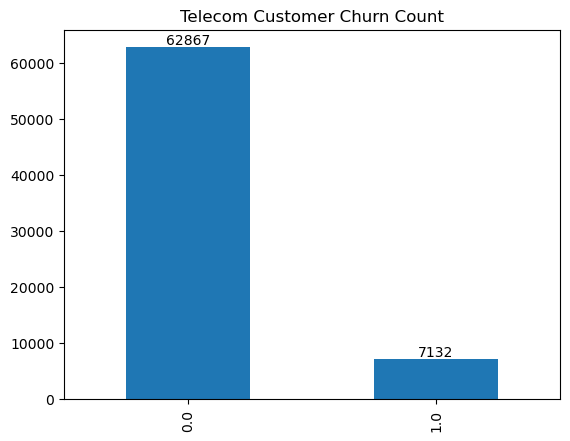

In [68]:
### bar chart to show the number of customer who has churned teh telecom provider i.e. 1 and not churned i.e 0

ax = telecomData.churn_probability.value_counts().plot.bar()
ax.bar_label(ax.containers[0])
plt.title("Telecom Customer Churn Count")
plt.show()

In [72]:
### pie  chart to show the distribution of the customer data by clustering them into 3 types
customer_segment = groupedData.category.value_counts()
plt.pie(customer_segment,labels=customer_segment.keys().map({0:'Low',1:'average',2:'high'}) )
plt.legend()
plt.show()

AttributeError: 'DataFrame' object has no attribute 'category'

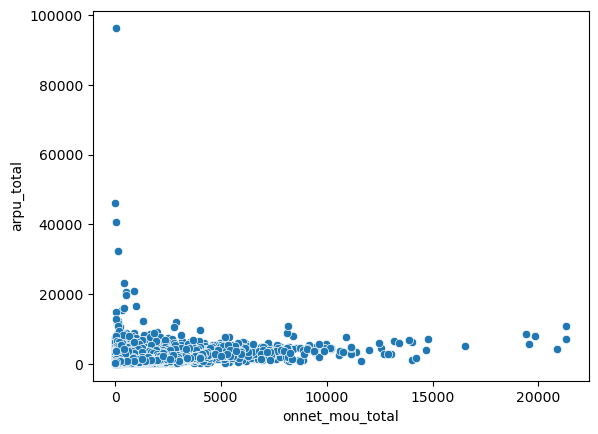

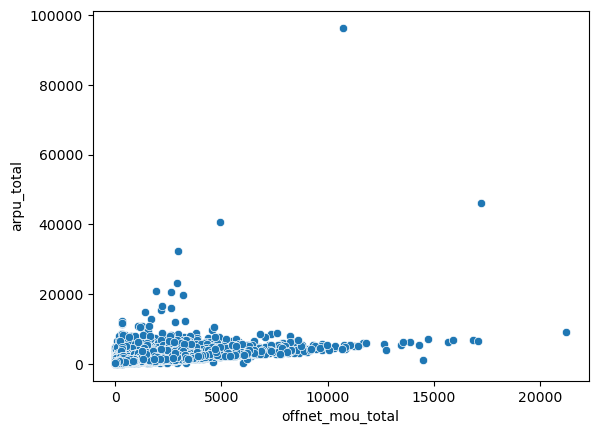

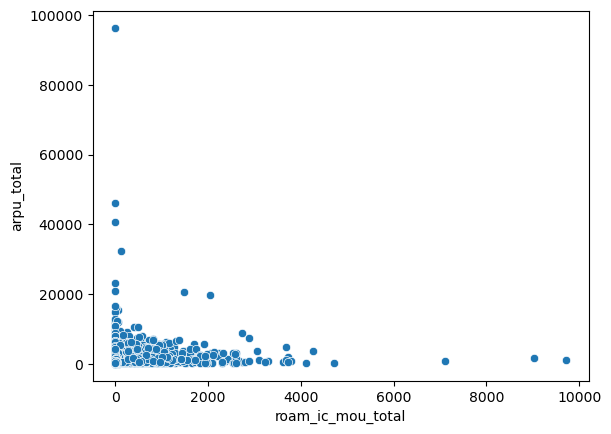

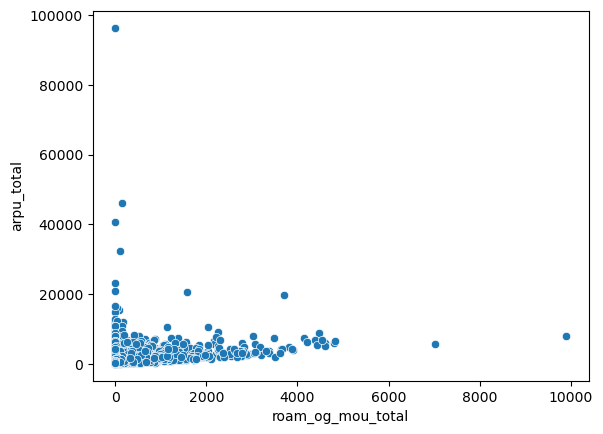

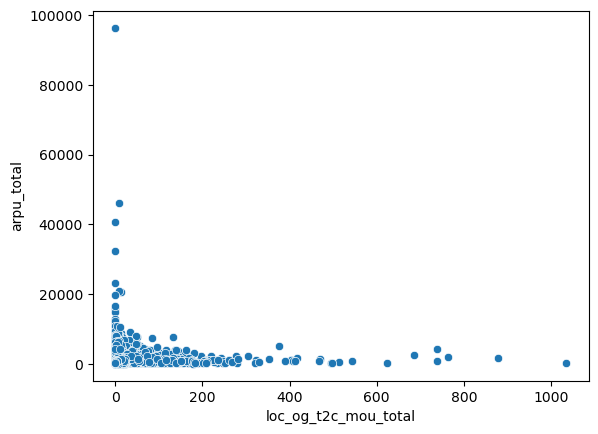

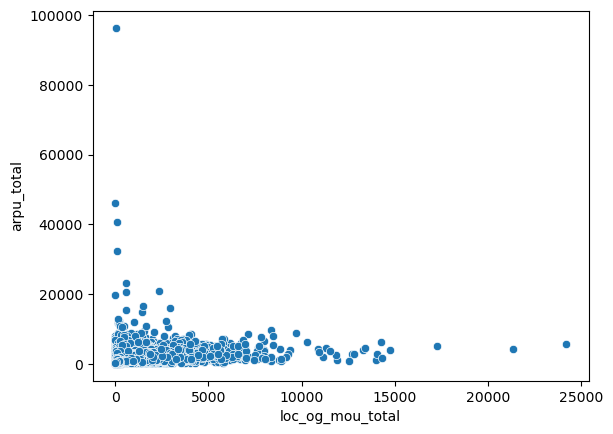

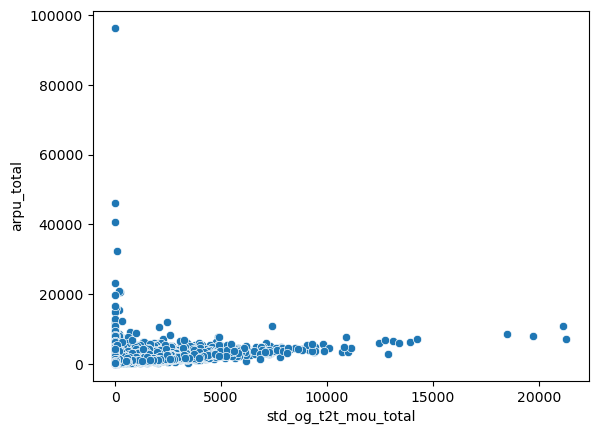

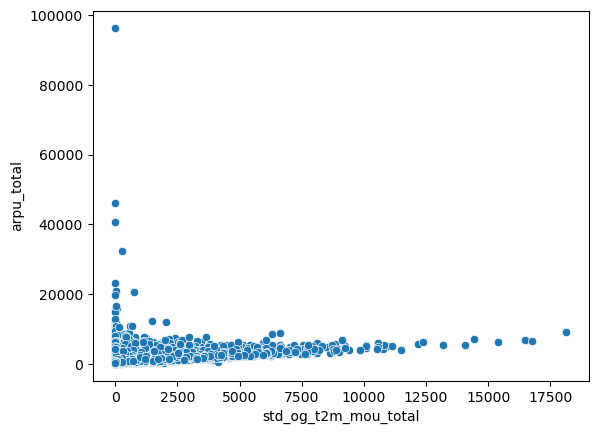

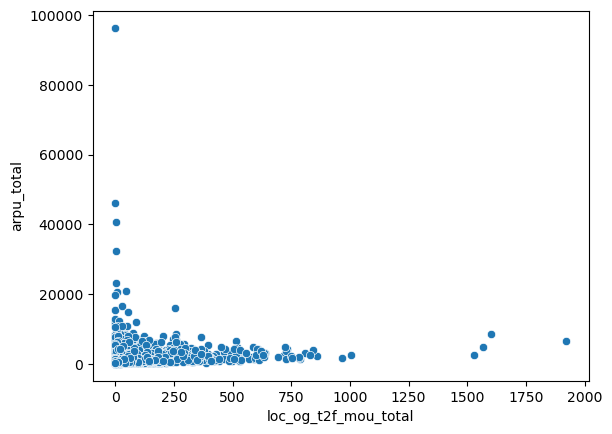

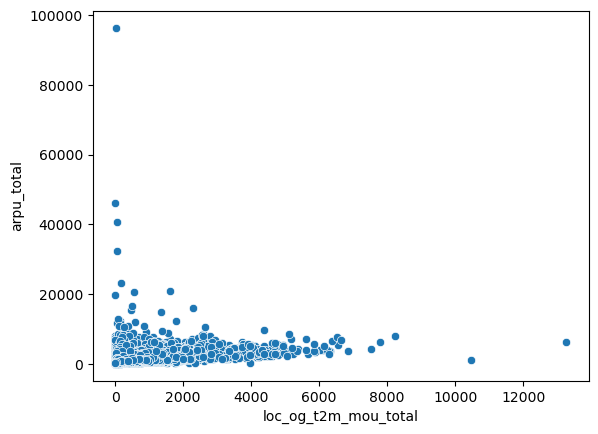

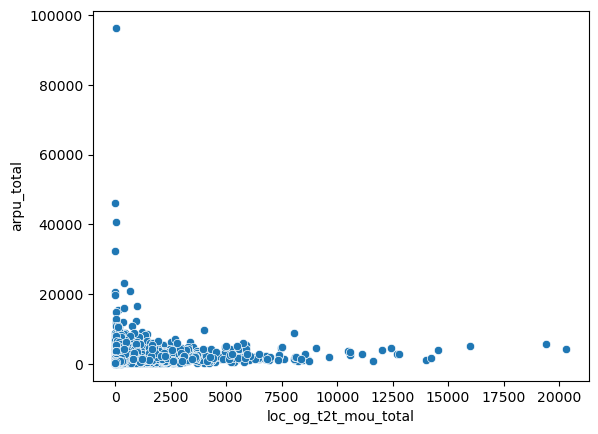

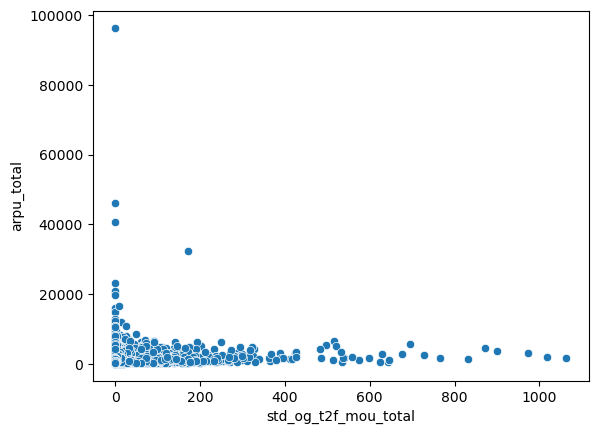

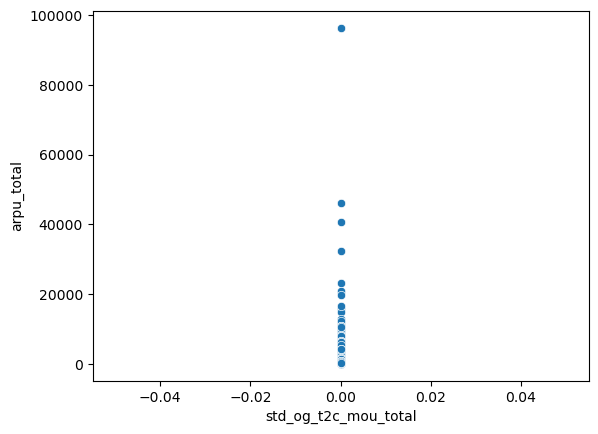

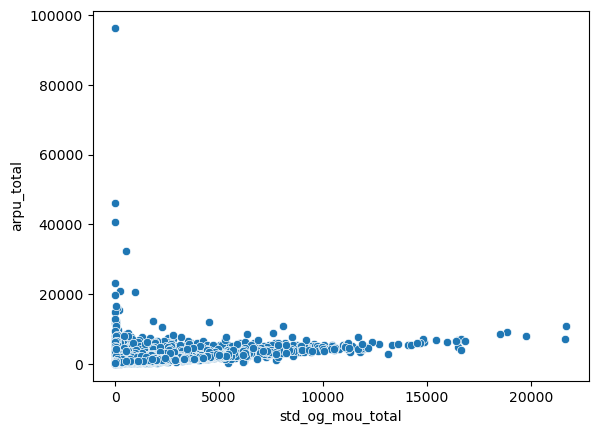

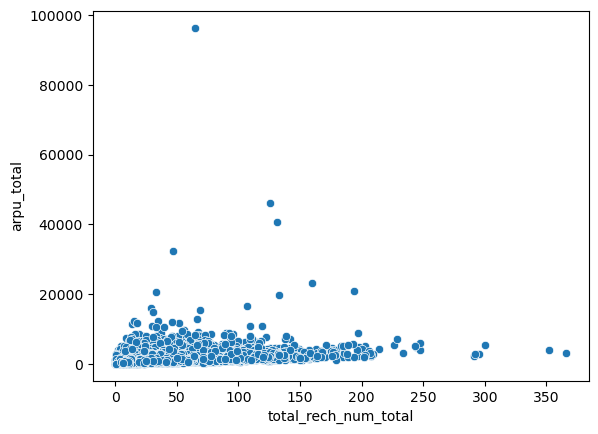

In [73]:

columns_to_plot = ['onnet_mou_total',         
              
'offnet_mou_total',        
'roam_ic_mou_total',       
'roam_og_mou_total',       
'loc_og_t2c_mou_total',    
'loc_og_mou_total',        
'std_og_t2t_mou_total',    
'std_og_t2m_mou_total',    
'loc_og_t2f_mou_total',    
'loc_og_t2m_mou_total',    
'loc_og_t2t_mou_total',    
'std_og_t2f_mou_total',    
'std_og_t2c_mou_total',    
'std_og_mou_total',        
'total_rech_num_total']

for x in columns_to_plot:
    sns.scatterplot(x=x,y='arpu_total',data=telecomData)
    plt.show()

<Axes: ylabel='arpu_total'>

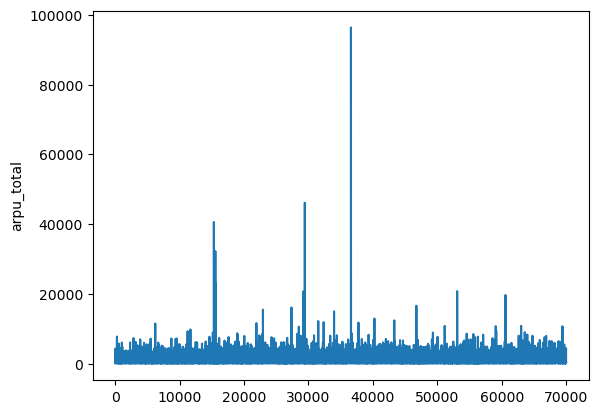

In [28]:
sns.lineplot(data=telecomData.arpu_total)

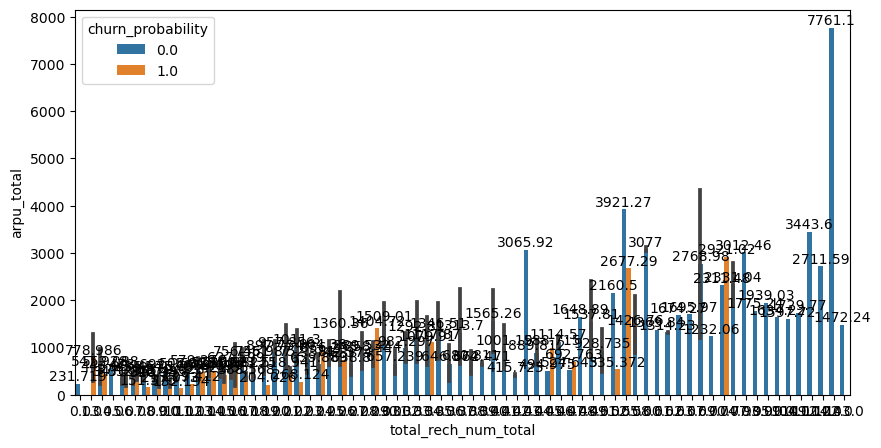

In [29]:
plt.figure(figsize=(10,5))
ax =sns.barplot(x='total_rech_num_total', y='arpu_total', hue="churn_probability", data=telecomData[:500], estimator=np.mean)
for container in ax.containers:
       plt.bar_label(container) 

plt.show()

### Ploting correlation matrix

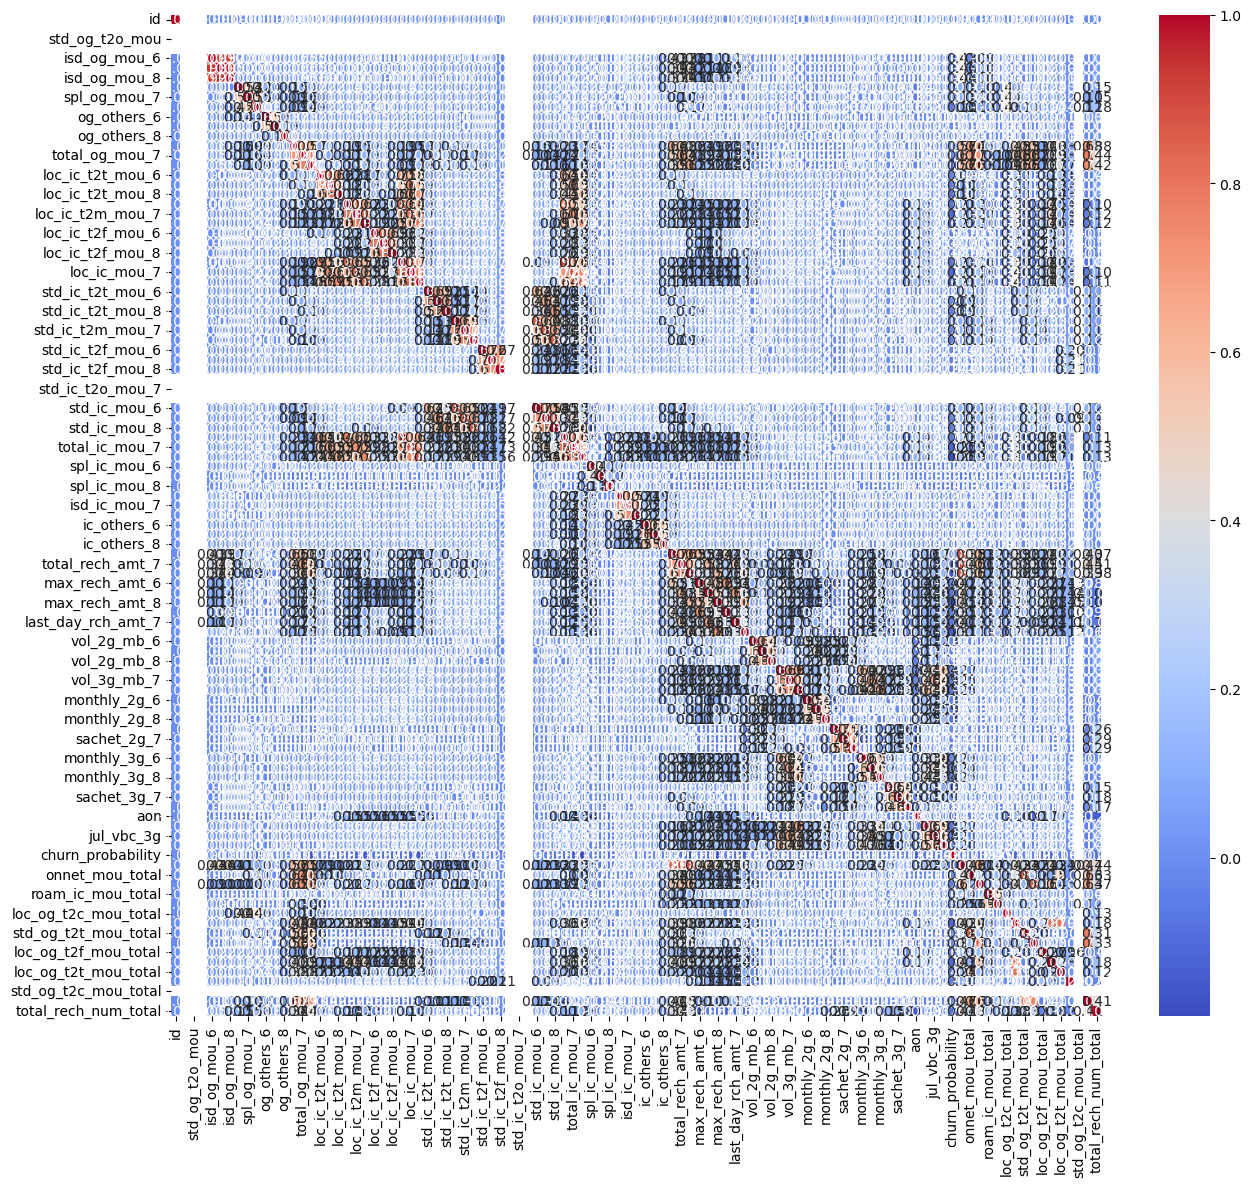

In [30]:
plt.figure(figsize=(15,13))
sns.heatmap(telecomData.corr(),annot=True,fmt='.2f', cmap='coolwarm')
plt.show()

### splitting data into training and testing dataset


In [ ]:
df_train ,df_test = train_test_split(telecomData,train_size=0.6,random_state=100)

In [32]:
### splitting into X and Y for train and test
y_train =df_train.pop("churn_probability")
X_train =df_train

y_test =df_test.pop("churn_probability")
X_test =df_test


### scaling data set

In [33]:
scale = MinMaxScaler()
X_train_scaled = scale.fit_transform(X_train);
X_test_scaled = scale.transform(X_test);

In [34]:
#### creating dataframe 
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

## Evaluating the data set with plain logistic regression along with RFE mechanism

In [35]:

logistic = LogisticRegression(random_state=100)
rfe = RFE(logistic,n_features_to_select=int(X_train.shape[1]/2))
rfe.fit(X=X_train_scaled,y=y_train)




C:\Users\91983\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\91983\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\91983\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\91983\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

RFE(estimator=LogisticRegression(random_state=100), n_features_to_select=51)

In [36]:
rfe_summary = list(zip(X_train_scaled.columns,rfe.support_,rfe.ranking_))

In [37]:
rfe_summary

[('id', False, 45),
 ('loc_og_t2o_mou', False, 51),
 ('std_og_t2o_mou', False, 50),
 ('loc_ic_t2o_mou', False, 49),
 ('isd_og_mou_6', False, 37),
 ('isd_og_mou_7', False, 40),
 ('isd_og_mou_8', False, 44),
 ('spl_og_mou_6', False, 29),
 ('spl_og_mou_7', False, 22),
 ('spl_og_mou_8', True, 1),
 ('og_others_6', False, 28),
 ('og_others_7', False, 42),
 ('og_others_8', False, 43),
 ('total_og_mou_6', True, 1),
 ('total_og_mou_7', True, 1),
 ('total_og_mou_8', True, 1),
 ('loc_ic_t2t_mou_6', False, 25),
 ('loc_ic_t2t_mou_7', False, 7),
 ('loc_ic_t2t_mou_8', True, 1),
 ('loc_ic_t2m_mou_6', False, 33),
 ('loc_ic_t2m_mou_7', True, 1),
 ('loc_ic_t2m_mou_8', True, 1),
 ('loc_ic_t2f_mou_6', False, 30),
 ('loc_ic_t2f_mou_7', True, 1),
 ('loc_ic_t2f_mou_8', True, 1),
 ('loc_ic_mou_6', True, 1),
 ('loc_ic_mou_7', False, 12),
 ('loc_ic_mou_8', True, 1),
 ('std_ic_t2t_mou_6', False, 11),
 ('std_ic_t2t_mou_7', True, 1),
 ('std_ic_t2t_mou_8', True, 1),
 ('std_ic_t2m_mou_6', False, 15),
 ('std_ic_t2m_mo

In [38]:
rfe_selected_columns = X_train_scaled.columns[rfe.support_]

In [39]:
rfe_selected_columns

Index(['spl_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_8',
       'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8',
       'std_ic_mou_6', 'std_ic_mou_8', 'total_ic_mou_7', 'total_ic_mou_8',
       'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6',
       'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_8', 'last_day_rch_amt_7',
       'last_day_rch_amt_8', 'vol_2g_mb_8', 'monthly_2g_8', 'sachet_2g_6',
       'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_8', 'aon',
       'onnet_mou_total', 'offnet_mou_total', 'roam_ic_mou_total',
       'roam_og_mou_total', 'loc_og_t2c_mou_total', 'loc_og_mou_total',
       'std_og_t2t_mou_total', 'std_og_t2m_mou_total', 'loc_og_t2f_mou_total',
       'loc_og_t2m_mou_total', 'loc_og_t2t_mou_total', 'std_og_t

## Comparing the result  for Logistic regression

In [40]:
####  logistic regression with rfe selected columns


X_train_rfe_selectedFeature = X_train_scaled[rfe_selected_columns]

X_test_rfe_selectedFeature = X_test_scaled[rfe_selected_columns]



logistic_regression = LogisticRegression(random_state=100)
logistic_regression.fit(X_train_rfe_selectedFeature,y_train)

y_train_rfe_predicted = logistic_regression.predict(X_train_rfe_selectedFeature);
y_test_rfe_predicted = logistic_regression.predict(X_test_rfe_selectedFeature);

In [41]:
###### metrics evaluation

accuracy_score_train_logistic = accuracy_score(y_pred=y_train_rfe_predicted,y_true = y_train)
accuracy_score_test_logistic = accuracy_score(y_pred=y_test_rfe_predicted,y_true = y_test)
print("accuracy_score_train_logistic",accuracy_score_train_logistic)
print("accuracy_score_test_logistic",accuracy_score_test_logistic)
print("***"*23)
print("train_classification_report")
print(classification_report(y_pred=y_train_rfe_predicted,y_true = y_train))

print("test_classification_report")
print(classification_report(y_pred=y_test_rfe_predicted,y_true = y_test))

print("***"*23)


accuracy_score_train_logistic 0.8993071263601514
accuracy_score_test_logistic 0.9015357142857143
*********************************************************************
train_classification_report
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95     37682
         1.0       0.65      0.04      0.08      4317

    accuracy                           0.90     41999
   macro avg       0.78      0.52      0.51     41999
weighted avg       0.88      0.90      0.86     41999

test_classification_report
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95     25185
         1.0       0.65      0.05      0.08      2815

    accuracy                           0.90     28000
   macro avg       0.77      0.52      0.52     28000
weighted avg       0.88      0.90      0.86     28000

*********************************************************************


###   Decision Tree

In [74]:

from sklearn.metrics import r2_score,accuracy_score,confusion_matrix
def evaluate_model(decision_tree,x_train_inp,x_test_inp,y_train_inp,y_test_inp):
    
    y_train_pred = decision_tree.predict(x_train_inp)
    y_test_pred = decision_tree.predict(x_test_inp)
    
    print("Train set evaluation")
    r2_score_train=r2_score(y_pred=y_train_pred,y_true=y_train_inp)
    accuracy_score_train = accuracy_score(y_pred=y_train_pred,y_true=y_train_inp)
    confusion_matrix_train = confusion_matrix(y_pred=y_train_pred,y_true=y_train_inp)
    print("r2_score_train  ",r2_score_train)
    print("accuracy_score_train ",accuracy_score_train)
    print("confusion_matrix_train ",confusion_matrix_train)
    
    print("+++++++++++"*6)
    
    print("Test set evaluation")
    r2_score_test=r2_score(y_pred=y_test_pred,y_true=y_test_inp)
    accuracy_score_test = accuracy_score(y_pred=y_test_pred,y_true=y_test_inp)
    confusion_matrix_test = confusion_matrix(y_pred=y_test_pred,y_true=y_test_inp)
    print("r2_score_test ",r2_score_test)
    print("accuracy_score_test ",accuracy_score_test)
    print("confusion_matrix_test ",confusion_matrix_test)



In [43]:
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz
def get_dt_graph(decision_tree,columns):
    dot_data = StringIO()  

    export_graphviz(decision_tree, out_file=dot_data, filled=True, rounded=True,
                feature_names=columns, 
                class_names=['0', "1"])

    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph
    

In [44]:
params ={
    'max_depth' :[3,5,7,9,10] ,
    'min_samples_split':[10,20,30,40,50], 
    'min_samples_leaf':[23,14,24,8,19]
}


In [45]:
import sklearn
sklearn.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

decisionTree = DecisionTreeClassifier(random_state=100)

gridsearch = GridSearchCV(estimator=decisionTree,
                          param_grid=params,
                          scoring="accuracy",
                          verbose=1,
                          n_jobs=1,
                          cv=3,
                          return_train_score=True
                        )
gridsearch.fit(X=X_train_rfe_selectedFeature,y=y_train)

In [46]:
decisionTree = DecisionTreeClassifier(random_state=100,max_depth=10,min_samples_leaf=12,min_samples_split=20)
decisionTree.fit(X=X_train,y=y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=12, min_samples_split=20,
                       random_state=100)

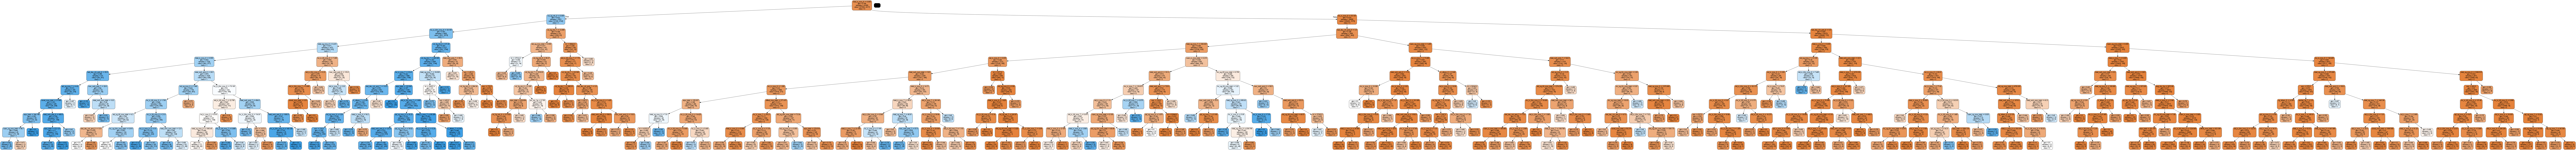

In [47]:
dt_graph = get_dt_graph(decision_tree=decisionTree,columns=X_train.columns)
Image(dt_graph.create_png())

In [48]:
evaluate_model(decision_tree=decisionTree,x_train_inp=X_train,x_test_inp=X_test,
               y_train_inp=y_train,y_test_inp=y_test)

Train set evaluation
r2_score_train   0.44233073827762914
accuracy_score_train  0.9485702040524775
confusion_matrix_train  [[36979   703]
 [ 1457  2860]]
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Test set evaluation
r2_score_test  0.2938366214347753
accuracy_score_test  0.9361428571428572
confusion_matrix_test  [[24544   641]
 [ 1147  1668]]


## Evaluation for Random Forest

In [49]:
randomForest = RandomForestClassifier(n_estimators=10,random_state=100,max_depth=10,min_samples_leaf=12,min_samples_split=20)
randomForest.fit(X=X_train,y=y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=12, min_samples_split=20,
                       n_estimators=10, random_state=100)

In [50]:
print(" Evaluation on Train data")
print("Accuracy :::: ",accuracy_score(y_pred=randomForest.predict(X_train),y_true=y_train))
print("r2_score :::: ",r2_score(y_pred=randomForest.predict(X_train),y_true=y_train))
print("confusion matrix :::: ",confusion_matrix(y_pred=randomForest.predict(X_train),y_true=y_train))
    
print(" Evaluation on Test data")
print("Accuracy :::: ",accuracy_score(y_pred=randomForest.predict(X_test),y_true=y_test))
print("r2_score :::: ",r2_score(y_pred=randomForest.predict(X_test),y_true=y_test))
print("confusion matrix :::: ",confusion_matrix(y_pred=randomForest.predict(X_test),y_true=y_test))

 Evaluation on Train data
Accuracy ::::  0.9448558299007119
r2_score ::::  0.4020546249310134
confusion matrix ::::  [[37069   613]
 [ 1703  2614]]
 Evaluation on Test data
Accuracy ::::  0.9422857142857143
r2_score ::::  0.3617673267553674
confusion matrix ::::  [[24733   452]
 [ 1164  1651]]


## Evaluation using adaboost classifier

In [51]:


adaboost = AdaBoostClassifier(n_estimators=25,random_state=10)
adaboost.fit(X_train_scaled,y_train)

AdaBoostClassifier(n_estimators=25, random_state=10)

In [52]:
print(" Evaluation on Train data")
print("Accuracy :::: ",accuracy_score(y_pred=adaboost.predict(X_train_scaled),y_true=y_train))
print("r2_score :::: ",r2_score(y_pred=adaboost.predict(X_train_scaled),y_true=y_train))
print("confusion matrix :::: ",confusion_matrix(y_pred=adaboost.predict(X_train_scaled),y_true=y_train))
    
print(" Evaluation on Test data")
print("Accuracy :::: ",accuracy_score(y_pred=adaboost.predict(X_test_scaled),y_true=y_test))
print("r2_score :::: ",r2_score(y_pred=adaboost.predict(X_test_scaled),y_true=y_test))
print("confusion matrix :::: ",confusion_matrix(y_pred=adaboost.predict(X_test_scaled),y_true=y_test))

 Evaluation on Train data
Accuracy ::::  0.9381890045001071
r2_score ::::  0.32976416507811346
confusion matrix ::::  [[36842   840]
 [ 1756  2561]]
 Evaluation on Test data
Accuracy ::::  0.9406428571428571
r2_score ::::  0.34359981254172056
confusion matrix ::::  [[24648   537]
 [ 1125  1690]]


## Evaluation using Gradient Boost Classifier

In [53]:

gb = GradientBoostingClassifier(n_estimators=25,random_state=10)

gb.fit(X_train_scaled,y_train)


GradientBoostingClassifier(n_estimators=25, random_state=10)

In [54]:
print(" Evaluation on Train data")
print("Accuracy :::: ",accuracy_score(y_pred=gb.predict(X_train_scaled),y_true=y_train))
print("r2_score :::: ",r2_score(y_pred=gb.predict(X_train_scaled),y_true=y_train))
print("confusion matrix :::: ",confusion_matrix(y_pred=gb.predict(X_train_scaled),y_true=y_train))
    
print(" Evaluation on Test data")
print("Accuracy :::: ",accuracy_score(y_pred=gb.predict(X_test_scaled),y_true=y_test))
print("r2_score :::: ",r2_score(y_pred=gb.predict(X_test_scaled),y_true=y_test))
print("confusion matrix :::: ",confusion_matrix(y_pred=gb.predict(X_test_scaled),y_true=y_test))

 Evaluation on Train data
Accuracy ::::  0.9416414676539918
r2_score ::::  0.36720029607336524
confusion matrix ::::  [[36936   746]
 [ 1705  2612]]
 Evaluation on Test data
Accuracy ::::  0.9428571428571428
r2_score ::::  0.36808646213402707
confusion matrix ::::  [[24707   478]
 [ 1122  1693]]


#  Comparing the outputs

In [55]:
###### metrics evaluation

accuracy_score_train_logistic = accuracy_score(y_pred=y_train_rfe_predicted,y_true = y_train)
accuracy_score_test_logistic = accuracy_score(y_pred=y_test_rfe_predicted,y_true = y_test)
print("accuracy_score_train_logistic",accuracy_score_train_logistic)
print("accuracy_score_test_logistic",accuracy_score_test_logistic)
print("***"*23)
print("train_classification_report")
print(classification_report(y_pred=y_train_rfe_predicted,y_true = y_train))

print("test_classification_report")
print(classification_report(y_pred=y_test_rfe_predicted,y_true = y_test))

print("***"*23)

accuracy_score_train_logistic 0.8993071263601514
accuracy_score_test_logistic 0.9015357142857143
*********************************************************************
train_classification_report
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95     37682
         1.0       0.65      0.04      0.08      4317

    accuracy                           0.90     41999
   macro avg       0.78      0.52      0.51     41999
weighted avg       0.88      0.90      0.86     41999

test_classification_report
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95     25185
         1.0       0.65      0.05      0.08      2815

    accuracy                           0.90     28000
   macro avg       0.77      0.52      0.52     28000
weighted avg       0.88      0.90      0.86     28000

*********************************************************************


In [56]:
for models in [adaboost,gb,randomForest,decisionTree]:
    
    print("***"*23)
    print("Report for "+str(models))
    print("Training Accuracy :::: ")
    print(accuracy_score(y_pred=models.predict(X_train_scaled),y_true=y_train))
    print("Training Classification :::: ")
    print(classification_report(y_pred=models.predict(X_train_scaled),y_true=y_train))
    print("***"*23)
    print("Testing Accuracy :::: ")
    print(accuracy_score(y_pred=models.predict(X_test_scaled),y_true=y_test))
    print("Testing Classification :::: ")
    print(classification_report(y_pred=models.predict(X_test_scaled),y_true=y_test))
    print("***"*23)
    

*********************************************************************
Report for AdaBoostClassifier(n_estimators=25, random_state=10)
Training Accuracy :::: 
0.9381890045001071
Training Classification :::: 
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97     37682
         1.0       0.75      0.59      0.66      4317

    accuracy                           0.94     41999
   macro avg       0.85      0.79      0.81     41999
weighted avg       0.93      0.94      0.93     41999

*********************************************************************
Testing Accuracy :::: 
0.9406428571428571
Testing Classification :::: 
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     25185
         1.0       0.76      0.60      0.67      2815

    accuracy                           0.94     28000
   macro avg       0.86      0.79      0.82     28000
weighted avg       0.94      0.94      0.94     28000

In [57]:
final_model = gb;

#### preparing the data set for the unseen dataset 

In [59]:
telecomData_test = pd.read_csv("./test.csv/test.csv")

nullcolumns = telecomData_test.columns[telecomData_test.isnull().sum()>0]



nullPercentage = round(100*(telecomData_test.isnull().sum()/len(telecomData_test)),2)
morethanHalfMissing = telecomData_test.columns[nullPercentage>50]
morethanHalfMissing






### columns which have more than 50% null values.
telecomData_test.drop(morethanHalfMissing,inplace=True,axis=1)

telecomData_test.drop(["circle_id","last_date_of_month_6","last_date_of_month_7","last_date_of_month_8"],inplace=True,axis=1)

telecomData_test.drop_duplicates(inplace=True)

telecomData_test['arpu_total'] =telecomData_test.arpu_6+telecomData_test.arpu_7+telecomData_test.arpu_8
telecomData_test.drop(['arpu_6','arpu_7','arpu_8'],axis=1,inplace=True)


telecomData_test['onnet_mou_total'] =telecomData_test.onnet_mou_6+telecomData_test.onnet_mou_7+telecomData_test.onnet_mou_8
telecomData_test.drop(['onnet_mou_6','onnet_mou_7','onnet_mou_8'],axis=1,inplace=True)


telecomData_test['offnet_mou_total'] =telecomData_test.offnet_mou_6+telecomData_test.offnet_mou_7+telecomData_test.offnet_mou_8
telecomData_test.drop(['offnet_mou_6','offnet_mou_7','offnet_mou_8'],axis=1,inplace=True)



telecomData_test['roam_ic_mou_total'] =telecomData_test.roam_ic_mou_6+telecomData_test.roam_ic_mou_7+telecomData_test.roam_ic_mou_8
telecomData_test.drop(['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8'],axis=1,inplace=True)


telecomData_test['roam_og_mou_total'] =telecomData_test.roam_og_mou_6+telecomData_test.roam_og_mou_7+telecomData_test.roam_og_mou_8
telecomData_test.drop(['roam_og_mou_6','roam_og_mou_7','roam_og_mou_8'],axis=1,inplace=True)


telecomData_test['loc_og_t2c_mou_total'] =telecomData_test.loc_og_t2c_mou_6+telecomData_test.loc_og_t2c_mou_7+telecomData_test.loc_og_t2c_mou_8
telecomData_test.drop(['loc_og_t2c_mou_6','loc_og_t2c_mou_7','loc_og_t2c_mou_8'],axis=1,inplace=True)

telecomData_test['loc_og_mou_total'] =telecomData_test.loc_og_mou_6+telecomData_test.loc_og_mou_7+telecomData_test.loc_og_mou_8
telecomData_test.drop(['loc_og_mou_6','loc_og_mou_7','loc_og_mou_8'],axis=1,inplace=True)


telecomData_test['std_og_t2t_mou_total'] =telecomData_test.std_og_t2t_mou_6+telecomData_test.std_og_t2t_mou_7+telecomData_test.std_og_t2t_mou_8
telecomData_test.drop(['std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8'],axis=1,inplace=True)


telecomData_test['std_og_t2m_mou_total'] =telecomData_test.std_og_t2m_mou_6+telecomData_test.std_og_t2m_mou_7+telecomData_test.std_og_t2m_mou_8
telecomData_test.drop(['std_og_t2m_mou_6','std_og_t2m_mou_7','std_og_t2m_mou_8'],axis=1,inplace=True)

telecomData_test['loc_og_t2f_mou_total'] =telecomData_test.loc_og_t2f_mou_6+telecomData_test.loc_og_t2f_mou_7+telecomData_test.loc_og_t2f_mou_8
telecomData_test.drop(['loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8'],axis=1,inplace=True)


telecomData_test['loc_og_t2m_mou_total'] =telecomData_test.loc_og_t2m_mou_6+telecomData_test.loc_og_t2m_mou_7+telecomData_test.loc_og_t2m_mou_8
telecomData_test.drop(['loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8'],axis=1,inplace=True)


telecomData_test['loc_og_t2t_mou_total'] =telecomData_test.loc_og_t2t_mou_6+telecomData_test.loc_og_t2t_mou_7+telecomData_test.loc_og_t2t_mou_8
telecomData_test.drop(['loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8'],axis=1,inplace=True)

telecomData_test['std_og_t2f_mou_total'] =telecomData_test.std_og_t2f_mou_6+telecomData_test.std_og_t2f_mou_7+telecomData_test.std_og_t2f_mou_8
telecomData_test.drop(['std_og_t2f_mou_6','std_og_t2f_mou_8','std_og_t2f_mou_7'],axis=1,inplace=True)


telecomData_test['std_og_t2c_mou_total'] =telecomData_test.std_og_t2c_mou_6+telecomData_test.std_og_t2c_mou_7+telecomData_test.std_og_t2c_mou_8
telecomData_test.drop(['std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8'],axis=1,inplace=True)


telecomData_test['std_og_mou_total'] =telecomData_test.std_og_mou_6+telecomData_test.std_og_mou_7+telecomData_test.std_og_mou_8
telecomData_test.drop(['std_og_mou_7','std_og_mou_8','std_og_mou_6'],axis=1,inplace=True)

telecomData_test['total_rech_num_total'] =telecomData_test.total_rech_num_6+telecomData_test.total_rech_num_7+telecomData_test.total_rech_num_8
telecomData_test.drop(['total_rech_num_7','total_rech_num_8','total_rech_num_6'],axis=1,inplace=True)

## all the non object columns

nonObjectColumns = telecomData_test.columns[telecomData_test.dtypes !='object']
objectColumns = telecomData_test.columns[telecomData_test.dtypes=='object']

objectColumns



for objectType in objectColumns:
    telecomData_test[objectType] = pd.to_datetime(telecomData_test[objectType],format="%m/%d/%Y")

max_date = telecomData_test.date_of_last_rech_8.max() 

for objectType in objectColumns:
    telecomData_test[objectType] = max_date-telecomData_test[objectType]

telecomData_test.head()













### dropping column id and circle_id as this column doesnot make any sense
telecomData_test.drop(objectColumns,axis=1,inplace=True)










#### populating the missing values with median of each column

imputer = SimpleImputer(strategy='median')
telecomData_test[nonObjectColumns] = imputer.fit_transform(telecomData_test[nonObjectColumns])


telecomData_test.isnull().sum()



id_test_data = telecomData_test.id
telecomData_test[telecomData_test.columns] = scale.transform(telecomData_test[telecomData_test.columns])


test_record_predicted = final_model.predict(telecomData_test)

In [60]:
final_dataframe = pd.DataFrame()
final_dataframe['id'] = id_test_data
final_dataframe['churn_probability'] = test_record_predicted

In [61]:
final_dataframe.to_csv("final_result.csv")